# Прогнозирование вероятности оттока пользователей для фитнес-центров

На основе данных о посетителях сети фитнес-центров спрогнозировать вероятность оттока для каждого клиента в следующем месяце, сформировать с помощью кластеризации портреты пользователей

# Подготовительные действия

In [1]:
pip install seaborn==0.11.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импортируем необходимые библиотеки
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings("ignore") 

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предварительное-знакомство-с-датасетом" data-toc-modified-id="Загрузка-и-предварительное-знакомство-с-датасетом-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предварительное знакомство с датасетом</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-наличие-отсутствующих-признаки,-изучим-средние-значения-и-стандартные-отклонения" data-toc-modified-id="Проверим-наличие-отсутствующих-признаки,-изучим-средние-значения-и-стандартные-отклонения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим наличие отсутствующих признаки, изучим средние значения и стандартные отклонения</a></span></li><li><span><a href="#Посмотрим-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался" data-toc-modified-id="Посмотрим-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался</a></span></li><li><span><a href="#Построим-распределения-признаков-для-тех,-кто-ушёл-в-отток-и-тех,-кто-остался" data-toc-modified-id="Построим-распределения-признаков-для-тех,-кто-ушёл-в-отток-и-тех,-кто-остался-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Построим распределения признаков для тех, кто ушёл в отток и тех, кто остался</a></span><ul class="toc-item"><li><span><a href="#Признак-lifetime" data-toc-modified-id="Признак-lifetime-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Признак <code>lifetime</code></a></span></li><li><span><a href="#Признак-contract_period" data-toc-modified-id="Признак-contract_period-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Признак <code>contract_period</code></a></span></li><li><span><a href="#Признак-month_to_end_contract" data-toc-modified-id="Признак-month_to_end_contract-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Признак <code>month_to_end_contract</code></a></span></li><li><span><a href="#Признак-avg_class_frequency_current_month" data-toc-modified-id="Признак-avg_class_frequency_current_month-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Признак <code>avg_class_frequency_current_month</code></a></span></li><li><span><a href="#Признак-promo_friends" data-toc-modified-id="Признак-promo_friends-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Признак <code>promo_friends</code></a></span></li><li><span><a href="#Признак-group_visits" data-toc-modified-id="Признак-group_visits-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Признак <code>group_visits</code></a></span></li><li><span><a href="#Признак-partner" data-toc-modified-id="Признак-partner-2.3.7"><span class="toc-item-num">2.3.7&nbsp;&nbsp;</span>Признак <code>partner</code></a></span></li><li><span><a href="#Признак-avg_additional_charges_total" data-toc-modified-id="Признак-avg_additional_charges_total-2.3.8"><span class="toc-item-num">2.3.8&nbsp;&nbsp;</span>Признак <code>avg_additional_charges_total</code></a></span></li><li><span><a href="#Признак-avg_class_frequency_total" data-toc-modified-id="Признак-avg_class_frequency_total-2.3.9"><span class="toc-item-num">2.3.9&nbsp;&nbsp;</span>Признак <code>avg_class_frequency_total</code></a></span></li><li><span><a href="#Признак-near_location" data-toc-modified-id="Признак-near_location-2.3.10"><span class="toc-item-num">2.3.10&nbsp;&nbsp;</span>Признак <code>near_location</code></a></span></li><li><span><a href="#Признак-age" data-toc-modified-id="Признак-age-2.3.11"><span class="toc-item-num">2.3.11&nbsp;&nbsp;</span>Признак <code>age</code></a></span></li><li><span><a href="#Признак-phone" data-toc-modified-id="Признак-phone-2.3.12"><span class="toc-item-num">2.3.12&nbsp;&nbsp;</span>Признак <code>phone</code></a></span></li><li><span><a href="#Признак-gender" data-toc-modified-id="Признак-gender-2.3.13"><span class="toc-item-num">2.3.13&nbsp;&nbsp;</span>Признак <code>gender</code></a></span></li></ul></li><li><span><a href="#Построим-матрицу-корреляций" data-toc-modified-id="Построим-матрицу-корреляций-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Построим матрицу корреляций</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Построим-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Построим-модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построим модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Проведём-кластеризацию-клиентов" data-toc-modified-id="Проведём-кластеризацию-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведём кластеризацию клиентов</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-на-средние-значения-признаков" data-toc-modified-id="Посмотрим-на-средние-значения-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Посмотрим на средние значения признаков</a></span></li><li><span><a href="#Построим-распределения-признаков-для-кластеров" data-toc-modified-id="Построим-распределения-признаков-для-кластеров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построим распределения признаков для кластеров</a></span><ul class="toc-item"><li><span><a href="#Признак-lifetime" data-toc-modified-id="Признак-lifetime-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Признак <code>lifetime</code></a></span></li><li><span><a href="#Признак-contract_period" data-toc-modified-id="Признак-contract_period-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Признак <code>contract_period</code></a></span></li><li><span><a href="#Признак-month_to_end_contract" data-toc-modified-id="Признак-month_to_end_contract-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Признак <code>month_to_end_contract</code></a></span></li><li><span><a href="#Признак-avg_class_frequency_current_month" data-toc-modified-id="Признак-avg_class_frequency_current_month-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Признак <code>avg_class_frequency_current_month</code></a></span></li><li><span><a href="#Признак-promo_friends" data-toc-modified-id="Признак-promo_friends-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Признак <code>promo_friends</code></a></span></li><li><span><a href="#Признак-group_visits" data-toc-modified-id="Признак-group_visits-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Признак <code>group_visits</code></a></span></li><li><span><a href="#Признак-partner" data-toc-modified-id="Признак-partner-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span>Признак <code>partner</code></a></span></li><li><span><a href="#Признак-avg_additional_charges_total" data-toc-modified-id="Признак-avg_additional_charges_total-4.2.8"><span class="toc-item-num">4.2.8&nbsp;&nbsp;</span>Признак <code>avg_additional_charges_total</code></a></span></li><li><span><a href="#Признак-avg_class_frequency_total" data-toc-modified-id="Признак-avg_class_frequency_total-4.2.9"><span class="toc-item-num">4.2.9&nbsp;&nbsp;</span>Признак <code>avg_class_frequency_total</code></a></span></li><li><span><a href="#Признак-near_location" data-toc-modified-id="Признак-near_location-4.2.10"><span class="toc-item-num">4.2.10&nbsp;&nbsp;</span>Признак <code>near_location</code></a></span></li><li><span><a href="#Признак-age" data-toc-modified-id="Признак-age-4.2.11"><span class="toc-item-num">4.2.11&nbsp;&nbsp;</span>Признак <code>age</code></a></span></li><li><span><a href="#Признак-phone" data-toc-modified-id="Признак-phone-4.2.12"><span class="toc-item-num">4.2.12&nbsp;&nbsp;</span>Признак <code>phone</code></a></span></li><li><span><a href="#Признак-gender" data-toc-modified-id="Признак-gender-4.2.13"><span class="toc-item-num">4.2.13&nbsp;&nbsp;</span>Признак <code>gender</code></a></span></li></ul></li><li><span><a href="#Для-каждого-кластера-посчитаем-долю-оттока" data-toc-modified-id="Для-каждого-кластера-посчитаем-долю-оттока-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Для каждого кластера посчитаем долю оттока</a></span></li></ul></li><li><span><a href="#Сформулируем-выводы-и-сделаем-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Сформулируем-выводы-и-сделаем-базовые-рекомендации-по-работе-с-клиентами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами</a></span><ul class="toc-item"><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Рекомендации-по-работе-с-клиентами" data-toc-modified-id="Рекомендации-по-работе-с-клиентами-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Рекомендации по работе с клиентами</a></span></li></ul></li></ul></div>

## Загрузка и предварительное знакомство с датасетом

In [3]:
# читаем данные из файла
data = pd.read_csv('datasets/gym_churn.csv')

# изучаем общую информацию
display(data.info(memory_usage='deep'))

# смотрим на первые 5 строк
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# посчитаем количество полных дубликатов
print(
    'В датасете {} полных дубликатов'.format(data.duplicated().sum())
)

В датасете 0 полных дубликатов


Первые впечатления:
- пропусков данных нет;
- данные имеют правильные, но избыточные типы;
- нет данных типа `object`, которые могут буть неправильно восприняты моделью при обучении;
- названия столбцов неплохо бы привести к нижнему регистру для единообразия и удобства работы;
- полных дубликатов не обнаружено

In [5]:
# приведём названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)

## приведём данные к достаточным типам
# к целочисленным
for i in [
    'gender',
    'near_location',
    'partner',
    'promo_friends',
    'phone',
    'contract_period',
    'group_visits',
    'age',
    'month_to_end_contract',
    'lifetime',
    'churn'
]:
    data[i] = pd.to_numeric(data[i], downcast='unsigned')
    
# к типам с плавающей точкой
for i in [
    'avg_additional_charges_total',
    'avg_class_frequency_total',
    'avg_class_frequency_current_month'
]:
    data[i] = pd.to_numeric(data[i], downcast='float')

Посмотрим на результат наших действий

In [6]:
# изучим общую информацию
display(data.info(memory_usage='deep'))

# выведем первые 5 строк
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null uint8
near_location                        4000 non-null uint8
partner                              4000 non-null uint8
promo_friends                        4000 non-null uint8
phone                                4000 non-null uint8
contract_period                      4000 non-null uint8
group_visits                         4000 non-null uint8
age                                  4000 non-null uint8
avg_additional_charges_total         4000 non-null float32
month_to_end_contract                4000 non-null uint8
lifetime                             4000 non-null uint8
avg_class_frequency_total            4000 non-null float32
avg_class_frequency_current_month    4000 non-null float32
churn                                4000 non-null uint8
dtypes: float32(3), uint8(11)
memory usage: 90.0 KB


None

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202934,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448486,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669865,12,2,3.205633,3.357214,0
4,1,1,1,1,1,1,0,26,198.362259,1,3,1.113884,1.120078,0


Данные приведены к необходимым и достаточным типам, столбцы переименованы для удобства работы, потребление памяти сократилось на 79,43% (с 437,6 КБ до 90 КБ). Можно считать, что данные готовы к исследовательскому анализу.

## Исследовательский анализ данных

### Проверим наличие отсутствующих признаки, изучим средние значения и стандартные отклонения

In [7]:
# дополнительно проверим наличие пропусков прямым способом
display(data.isna().sum())

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Пропусков нет, как мы и увидели раньше. Всё хорошо

In [8]:
# посмотрим на средние, стандартные отклонения, а также другие показатели
display(data.loc[:, data.columns != 'churn'].describe().T.sort_values(by='mean', ascending=False))

,count,mean,std,min,25%,50%,75%,max
avg_additional_charges_total,4000.0,146.943726,96.355606,0.148205,68.868832,136.220161,210.949619,552.590759
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000
lifetime,4000.0,3.724750,3.749267,0.000000,1.000000,3.000000,5.000000,31.000000
avg_class_frequency_total,4000.0,1.879020,0.972245,0.000000,1.180875,1.832768,2.536078,6.023668
avg_class_frequency_current_month,4000.0,1.767052,1.052906,0.000000,0.963003,1.719574,2.510336,6.146783
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000


Для всех признаков среднее и стандартные отклонения отличны от 0. Для бинарных признаков отклонения и среднее также отличны от 1, т.е. они среди бинарных признаков нет таких, которые принимали бы только значение 0 или 1.

### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [9]:
# выведем данные
mean_data = data.groupby('churn').agg('mean').T

#
mean_data['difference'] = round((mean_data[0] / mean_data[1] - 1) * 100, 2)

#
display(mean_data.sort_values(by='difference', ascending=False))

churn,0,1,difference
lifetime,4.711807,0.990575,375.66
contract_period,5.747193,1.728558,232.48
month_to_end_contract,5.283089,1.662582,217.76
avg_class_frequency_current_month,2.027882,1.044546,94.14
promo_friends,0.353522,0.183789,92.35
group_visits,0.464103,0.268615,72.78
partner,0.534195,0.355325,50.34
avg_additional_charges_total,158.445709,115.082901,37.68
avg_class_frequency_total,2.024876,1.474995,37.28
near_location,0.873086,0.768143,13.66


Итак, разберёмся с получившейся картиной:

- `lifetime	` - в среднем клиенты, принявшшие решение уйти, занимались в клубе всего 1 месяц. У группы оставшихся средняя продолжительность членства на 375,66% выше - 4,7 месяца;
- `contract_period` - средняя длительность абонемента у принявших решение уйти также намного меньше - 1,7 месяца вместо 5,7;
- `month_to_end_contract` - средний срок до окончания абонемента у решивших уйти, также значительно меньше, чем у тех, кто остался - 1,7 вместо 5,3;
- `avg_class_frequency_current_month` - ожидаемо, средняя частоста посещения фитнеса у тех, кто остался, почти в 2 раза выше, чем у группы, ушедшей в отток;
- `promo_friends` - среднее значение этого признака на 92,35% выше в группе лояльных клиентов;
- `group_visits` - среднее значение этого признака на 72,78% выше в группе лояльных клиентов;
- `partner`- среднее значение признака на 50,34% выше в группе тех, кто остался;
- `avg_additional_charges_total` - также вполне логично, что среднее значение дополнительных расходов выше в группе, которая осталась лояльной; 
- `avg_class_frequency_total` - общая средняя частота посещений клуба выше в группе лояльных клиентов;
- `near_location` - среднее значение признака у тех, кто решил остаться на 13,66% выше, чем у тех, кто ушёл в отток;
- `age` - в среднем, группа тех, кто остался верен клубу немного более возрастная, чем группа ушедших;
- `phone` - контактный телефон в среднем оставили 90% клиентов из обеих групп;
- `gender` - средние значения практически равны и находятся возле значения 0.5, т.е. можно сказать, что половая принадлежность не влияет на решение отказаться от услуг фитнеса;

По итогам можно сказать следующее - средние значения для всех признаков, за исключением наличия телефона и половой принадлежности, выше для группы лояльных клиентов.

### Построим распределения признаков для тех, кто ушёл в отток и тех, кто остался

In [10]:
# заворачиваем вывод в функцию
def show_hist(feature, mode, grouper):
    fig, plots = plt.subplots(figsize=(16, 9))

    # подписываем оси и выводим заголовок
    plots.set_title(f'Гистограмма признака {feature}')
    plots.set_xlabel(f'Признак {feature}')
    plots.set_ylabel(f'Кол-во значений признака {feature}')
    

    # строим графики
    sns.histplot(
        data=data,
        x=feature,
        hue=grouper,
        multiple=mode
    )
    
    if data[feature].max() <= 12:    
        plots.set_xticks(
            range(
                np.ceil(
                    data[feature].max()
                ).astype('int')+1
            )
        )
        plots.set_xticklabels(
            range(
                np.ceil(
                    data[feature].max()
                ).astype('int')+1
            )
        )
        
    plt.grid()
    plt.show()

Можно конечно, построить распределения для всех признаков в цикле, и получить абсолютно нечитаемый на 13 графиков в одной ячейке, но мы так делать не будем. Будем строить гистограммы распределения признаков по отдельности, в том же порядке, в котором они шли при изучении средних значений, и сразу подписывать выводы для каждого признака.

#### Признак `lifetime`

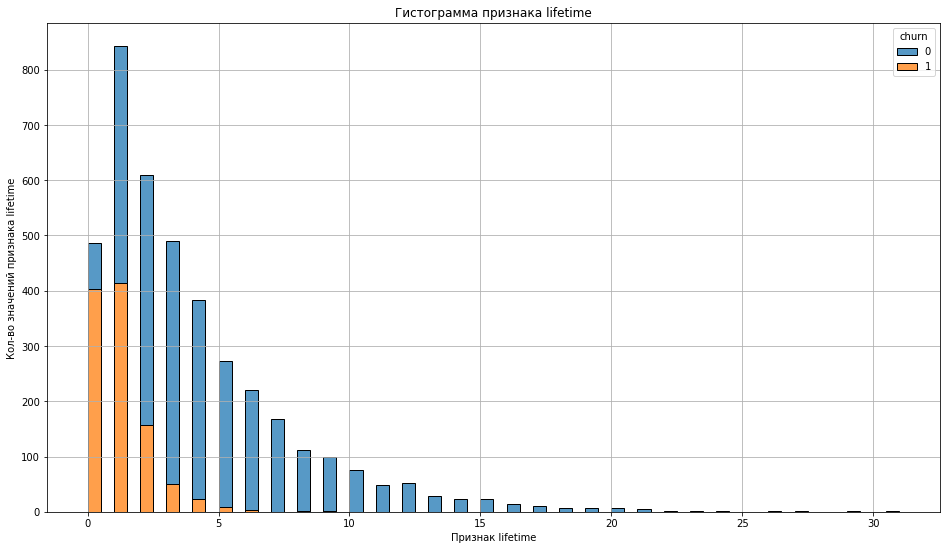

In [11]:
# строим гистограмму
show_hist('lifetime', 'stack', 'churn')

График показывает, что основная часть ушедших в отток, не ходила в клуб больше 2-х месяцев. Пользователей, ходивших в клуб более полугода и ушедших из него, можно считать аномалиями. Признак имеет распределение, схожее с распределением Пуассона.

#### Признак `contract_period`

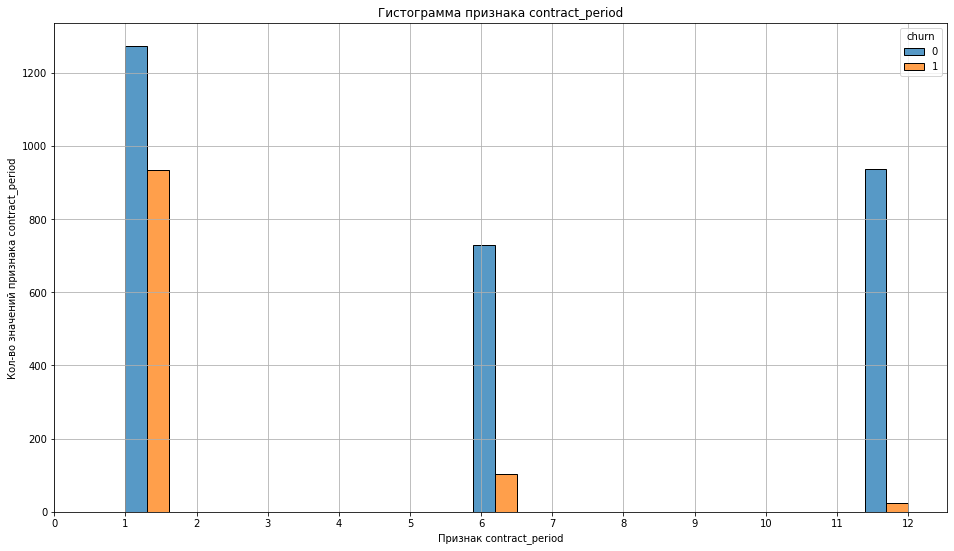

In [12]:
# строим гистограмму
show_hist('contract_period', 'dodge', 'churn')

Как мы уже увидели ранее, основная доля тех, кто ушёл, брали абонемент на малые сроки.

#### Признак `month_to_end_contract`

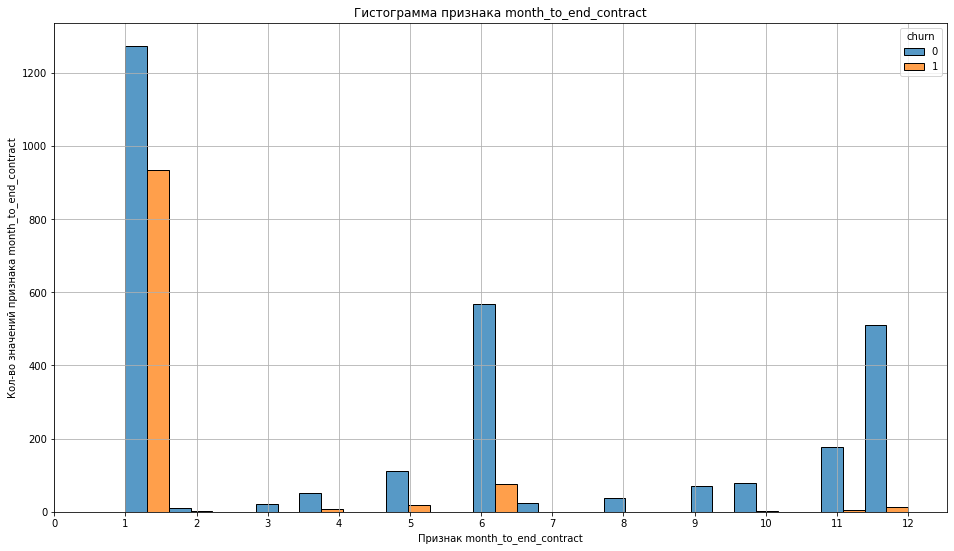

In [13]:
# строим гистограмму
show_hist('month_to_end_contract', 'dodge', 'churn')

Основной части ушедших пользователей остался всего 1 месяц до окончания абонемента. 

#### Признак `avg_class_frequency_current_month`

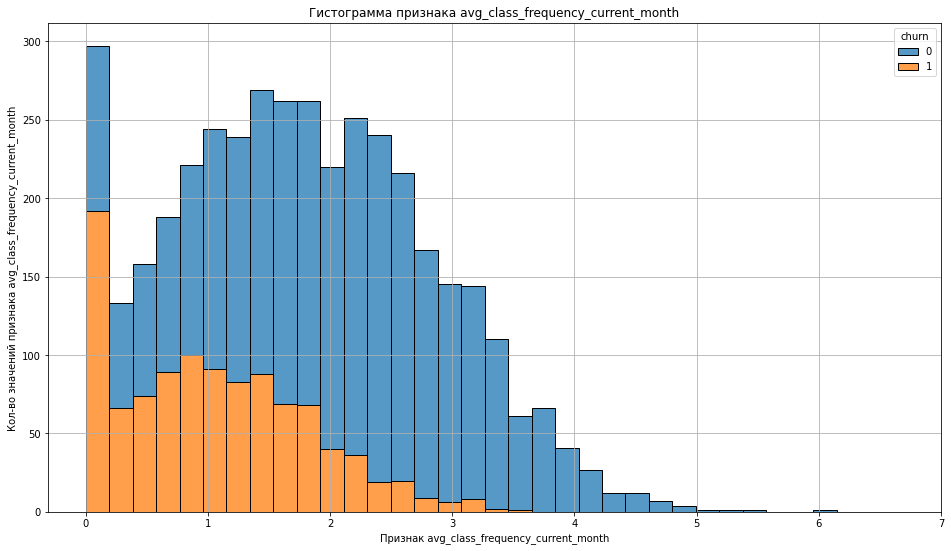

In [14]:
# строим гистограмму
show_hist('avg_class_frequency_current_month', 'stack', 'churn')

Данный признак уже имеет распределение, отдалённо похожее на нормальное. График распределения подтверждает, что ушедшие в отток клиенты имеют меньшее количество посещений в месяц, чем оставшиеся лояльными.

#### Признак `promo_friends`

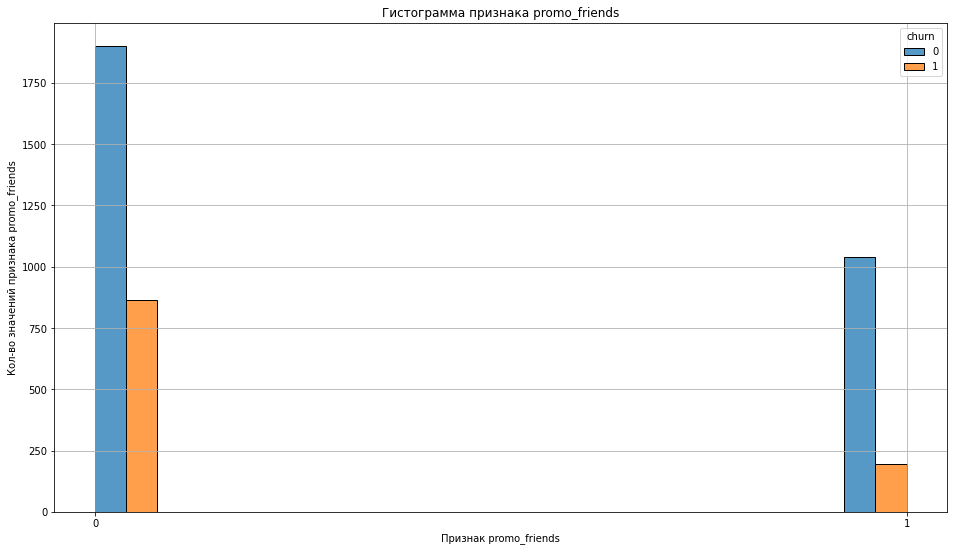

In [15]:
# строим гистограмму
show_hist('promo_friends', 'dodge', 'churn')

Как мы видим, доля ушедших в отток среди тех, кто пришёл по рекомендации друзей, значительно меньше, чем среди тех, кто пришёл сам.

#### Признак `group_visits`

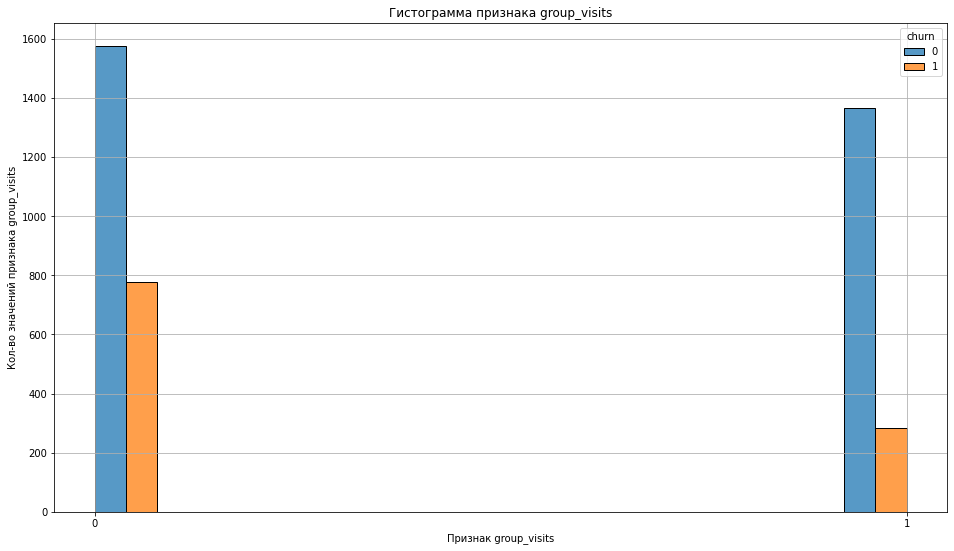

In [16]:
# строим гистограмму
show_hist('group_visits', 'dodge', 'churn')

Групповые занятия, похоже, также положительно влияют на пользователей. Среди тех, кто их посещал, доля ушедших в отток намного меньше.

#### Признак `partner`

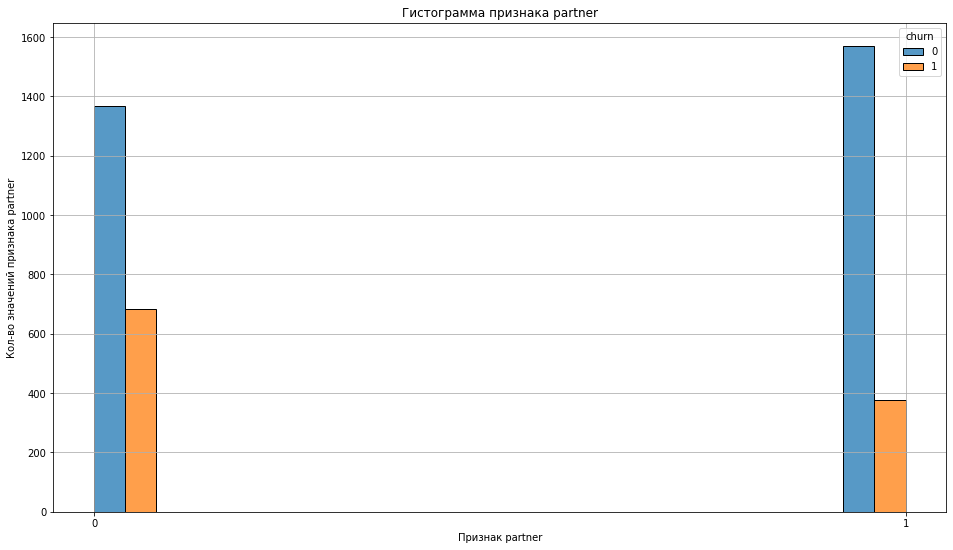

In [17]:
# строим гистограмму
show_hist('partner', 'dodge', 'churn')

Партнёрская программа, как видно из графика, также положительно влияент на клиентов. Из тех, кто пришёл по партнёрской программе, ушло меньше клиентов.

#### Признак `avg_additional_charges_total`

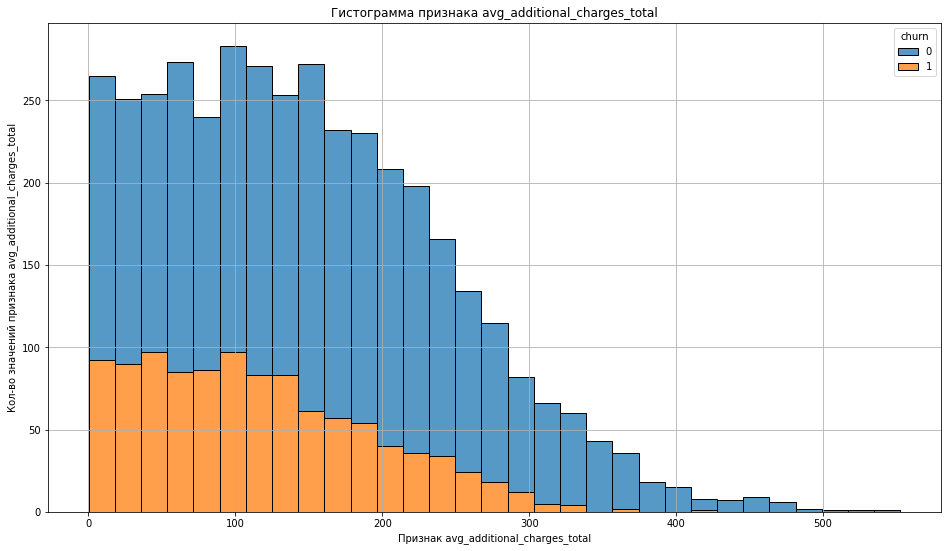

In [18]:
# строим гистограмму
show_hist('avg_additional_charges_total', 'stack', 'churn')

Распределение признака близко к распределению Пуассона.

#### Признак `avg_class_frequency_total`

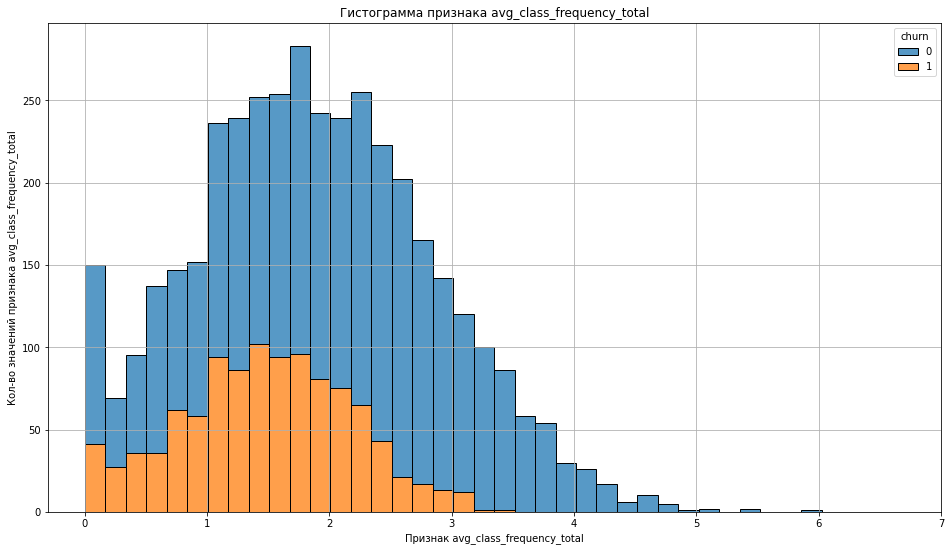

In [19]:
# строим гистограмму
show_hist('avg_class_frequency_total', 'stack', 'churn')

Распределение признака близко к нормальному.

#### Признак `near_location`

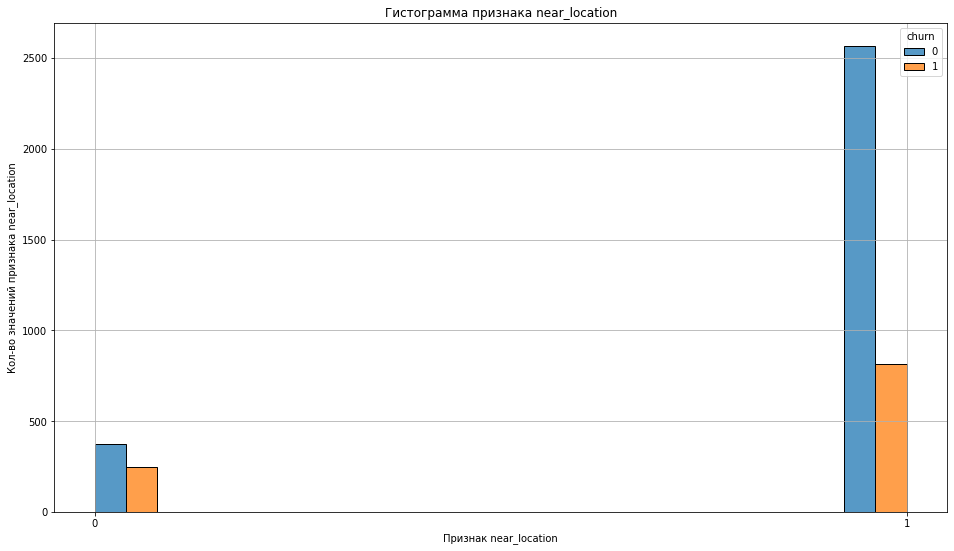

In [20]:
# строим гистограмму
show_hist('near_location', 'dodge', 'churn')

Распределение признака показывает, что близость к месту работы или проживания очень важна для клиентов клуба. Более половины клиентов, живущих не рядом, в итоге ушли в отток.

#### Признак `age`

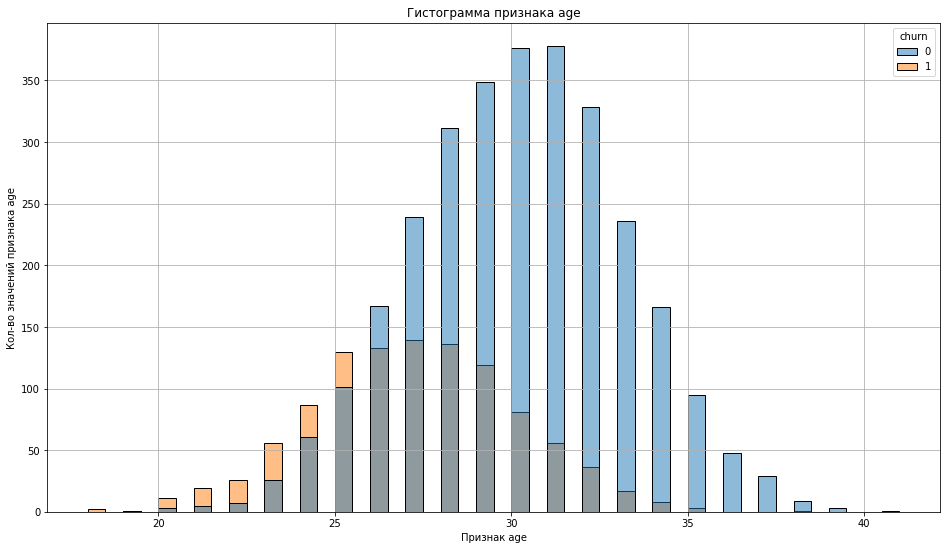

In [21]:
# строим гистограмму
show_hist('age', 'layer', 'churn')

Самый предсказуемый признак в плане распределения это возраст. Возраст обеих групп имеет нормальное распределение, но группа, покинувшая клуб - более молодая.

#### Признак `phone`

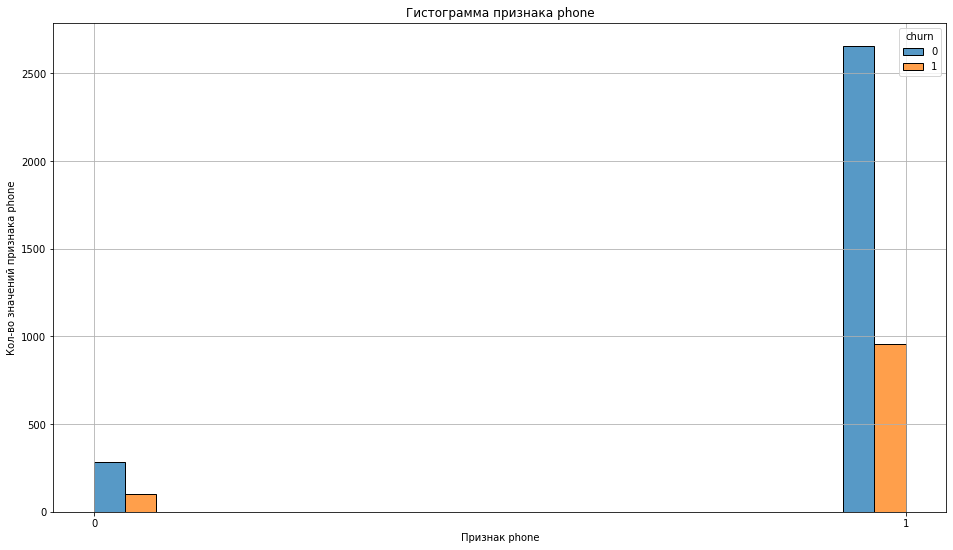

In [22]:
# строим гистограмму
show_hist('phone', 'dodge', 'churn')

Подтверждаем сделанные ранее выводы - доли ушедших примерно равны в обеих группах - у тех, у кого есть номер телефона в личном деле, и у тех, у кого его нет.

#### Признак `gender`

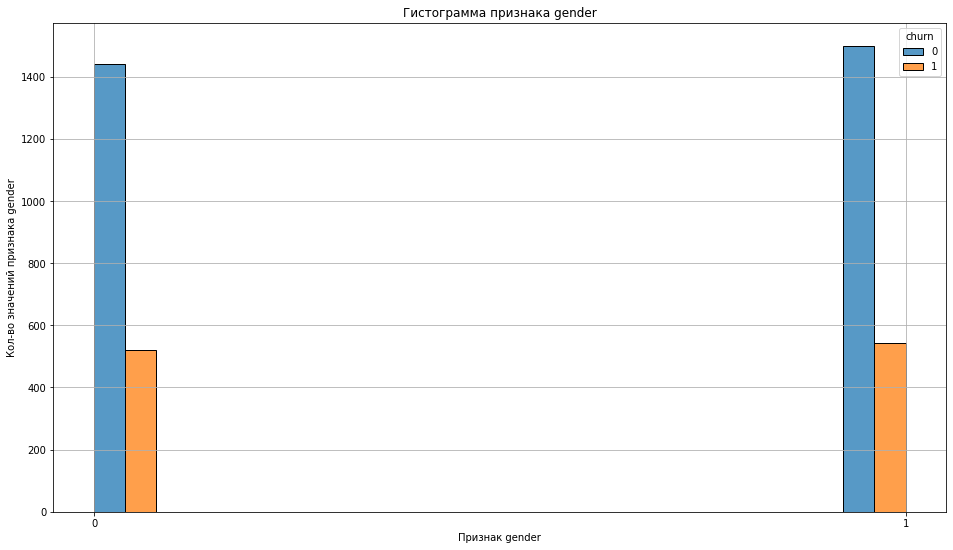

In [23]:
# строим гистограмму
show_hist('gender', 'dodge', 'churn')

Практически идеальная картина. И клиентов разного пола примерно поровну, и доли ушедших среди разных полов почти одинаковые.

### Построим матрицу корреляций

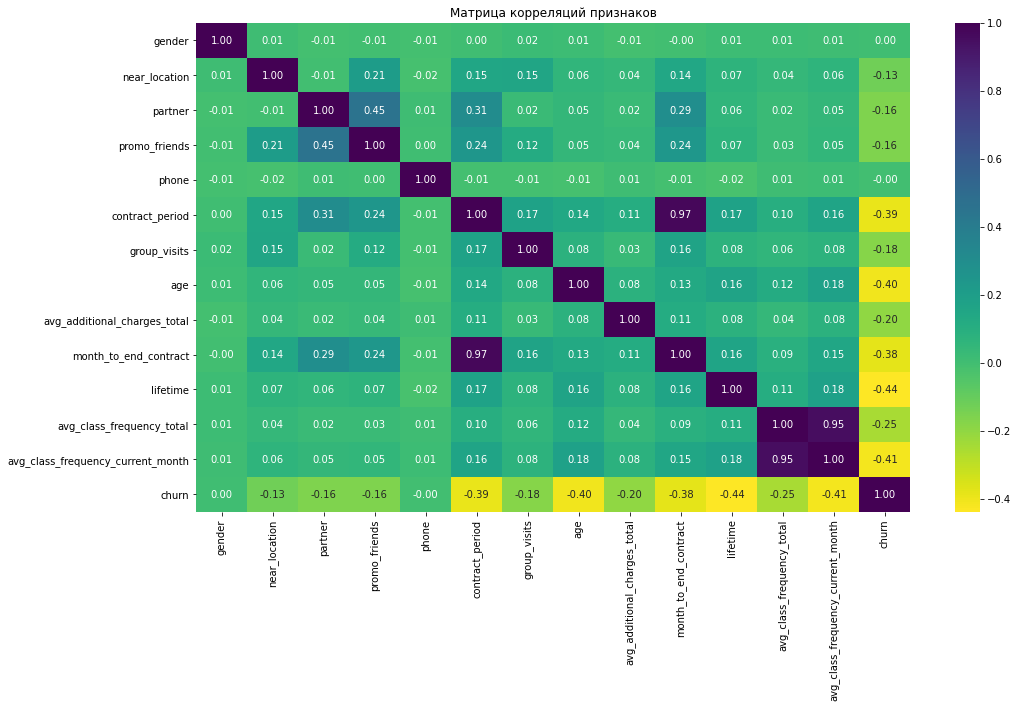

In [24]:
# рассчитываем матрицу
corr_matrix = data.corr()

# строим тепловую карту
plt.figure(figsize=(16, 9))
plt.title('Матрица корреляций признаков')
ax=sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='viridis_r'
)
plt.show()

Как видно из тепловой карты, сильнее всего с целевой переменной коррелируют такие параметры как срок членства в клубе, средняя ежемесячная посещаемость, возраст, длительность абонемента и остаток абонемента. При этом корреляции не ярко выраженные - значения коэффициентов корреляции менее 0,5.

Также у нас присутствует мультиколлинеарность по некоторым признакам. Выделим те, которые могут серьёзно исказить результаты (коэффициент коллинеарности более 0,8):

* `contract_period` и `month_to_end_contract` - имеют коэффициент корреляции 0,97
* `avg_class_frequency_current_month` и `avg_class_frequency_total` - имеют коэффициент корреляции 0,95

Для того, чтобы избежать ошибок в модели, сбросим по одному признаку из каждой пары: пусть это будут `month_to_end_contract` и `avg_class_frequency_total`.

### Вывод по разделу

В результате исследовательского анализа данных мы выяснили:
- в признаках нет пропусков;
- нет признаков, который целиком состоят из одного значения;
- нет признаков, которые слишком сильно влияют на целевую переменную.

В целом, можно сказать, что данные готовы для обучения модели.

## Построим модель прогнозирования оттока клиентов

In [25]:
# сформируем матрицу признаков и массив значений целевой переменной
X = data.drop(['churn', 'month_to_end_contract', 'avg_class_frequency_total'], axis=1)
y = data['churn']

In [26]:
# разбиваем признаки и целевую переменную на обучающую и тестовую выборки. Размер тестовой выборки - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# создаём модели
lr_model = LogisticRegression(
    solver='liblinear',
    random_state=0
)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=0
)

# обучаем модели
lr_model.fit(X_train_st, y_train)
rf_model.fit(X_train_st, y_train)

# делаем прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

# создадим функцию для вывода метрик моделей
def print_all_metrics(y_true, y_pred, y_proba, model):
        print(f'Метрики классификации для модели {model}')
        print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
        print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
        print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
        print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
        print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
        print('\n')
        
# выведем метрики для линейной регрессии
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    model='LinearRegressor'
)

# выведем метрики для случайного леса
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    model='RandomForestClassifier'
)

Метрики классификации для модели LinearRegressor
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
	F1: 0.84
	ROC_AUC: 0.97


Метрики классификации для модели RandomForestClassifier
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.77
	F1: 0.81
	ROC_AUC: 0.96




Полученные значения показывают, что по совокупности метрик, модель линейной регрессии для нашей задачи показала себя немного лучше, чем случайный лес.

## Проведём кластеризацию клиентов

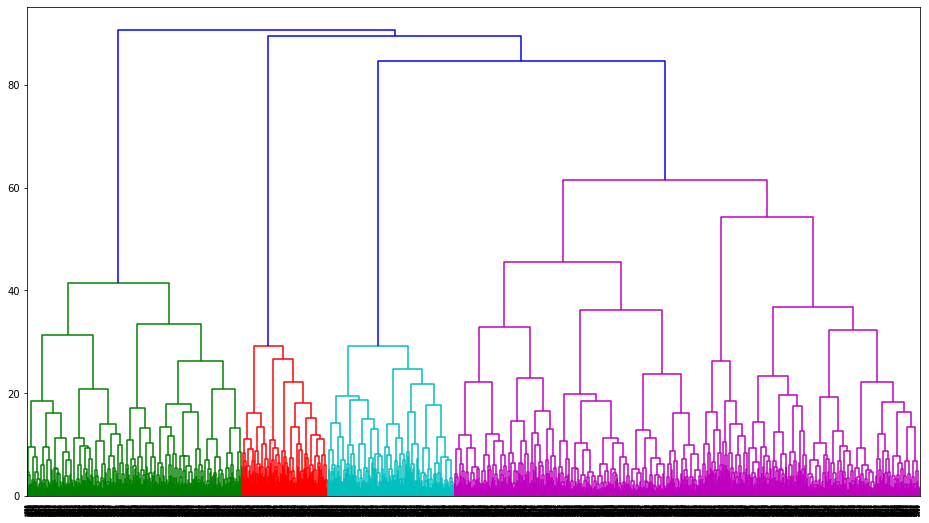

In [27]:
# стандартизируем выборку
X_sc = scaler.fit_transform(X)

# сохраняем таблицу связей
linked = linkage(X_sc, method = 'ward')

# строим дендрограмму
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation='top')
plt.show()

Судя по графику, наши клиенты поделились на 4 кластера.

In [28]:
# создаём модель k_means с числом кластеров 4
km = KMeans(n_clusters=4)

# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

# записываем результаты в датасет
data['cluster'] = labels

### Посмотрим на средние значения признаков 

In [29]:
# выводим на экран таблицу средних значений признаков для всех кластеров
display(data.loc[:, data.columns != 'churn'].groupby('cluster').agg('mean').T)

cluster,0,1,2,3
gender,0.530726,0.503330,0.492366,0.523316
near_location,0.924980,0.966698,0.666412,0.862694
partner,0.364725,0.869648,0.300763,0.471503
promo_friends,0.005587,1.000000,0.044275,0.305699
phone,1.000000,1.000000,1.000000,0.000000
contract_period,5.819633,6.648906,1.985496,4.777202
group_visits,0.538707,0.517602,0.202290,0.427461
age,30.563448,29.540438,27.545802,29.297927
avg_additional_charges_total,173.045273,151.932251,118.781700,144.208176
month_to_end_contract,5.324022,6.092293,1.903053,4.466321


Перед тем, как начать описывать кластеры, необходимо присвоить им алиасы, т.к. при перезапуске ноутбука номера кластеров будут меняться. Для этого выберем тот признак,  средние значения которого наиболее выразительно отличаются по кластерам и будем присваивать алиасы исходя из среднего значения. В нашем случае это признак `lifetime`. Отсортируем его средние значение по убыванию в разрезе кластеров и на основании этого присвоим нашим кластерам алиасы.

In [30]:
# формируем словарь с алиасами
cluster_alias = dict(
    zip(
        list(data.loc[:, data.columns != 'churn'].groupby('cluster').agg('mean')['lifetime'].sort_values(ascending=False).index),
        ['Alpha', 'Bravo', 'Charlie', 'Delta']
    )
)

In [31]:
# записываем значение
data['cluster_alias'] = data['cluster'].apply(
    lambda x: cluster_alias[x]
)

In [32]:
# выводим на экран
display(data.loc[:, data.columns != 'churn'].groupby('cluster_alias').agg('mean').T)

cluster_alias,Alpha,Bravo,Charlie,Delta
gender,0.530726,0.503330,0.523316,0.492366
near_location,0.924980,0.966698,0.862694,0.666412
partner,0.364725,0.869648,0.471503,0.300763
promo_friends,0.005587,1.000000,0.305699,0.044275
phone,1.000000,1.000000,0.000000,1.000000
contract_period,5.819633,6.648906,4.777202,1.985496
group_visits,0.538707,0.517602,0.427461,0.202290
age,30.563448,29.540438,29.297927,27.545802
avg_additional_charges_total,173.045273,151.932251,144.208176,118.781700
month_to_end_contract,5.324022,6.092293,4.466321,1.903053


Теперь наша таблица будет иметь всегда корректный вид, сколько бы раз мы не перезапускали ноутбук.

Исходя из полученных данных уже можно сделать предварительные наблюдения:
- распределение по половому признаку во всех кластерах примерно одинаковое - в целом соблюдается баланс;
- во всех кластерах есть значительная доля клиентов, живущих рядом; кластер Delta имеет наименьшее количество таких клиентов (67%);
- кластер Bravo на 87% состоит из клиентов, привлечённых по партнёрской программе, затем идёт Chralie (47%), Alpha (36,5%) и замыкает кластер Delta с 30%;
- кластер Bravo полностью сформирован из клиентов, пришедших по рекомендации друзей; кластер Charlie имеет 30% таких клиентов, все остальные содержат практически околонулевые значения этого признака;
- во всех кластерах, кроме Charlie клиенты указали свой контактный номер телефона;
- в среднем, самые большие абонементы в кластере Bravo (более полугода), самые короткие - в кластере Delta (около 2 месяцев);
- в кластере Delta самый низкий интерес к групповым визитам, в кластерах Alpha и Bravo - самый высокий;
- средний возраст во всех кластерах можно считать одинаковым;
- больше всего дополнительных покупок в клубе совершают кластеры Alpha и Bravo;
- распределение средней продолжительности остатка абонемента совпадает с распределением срока абонементов;
- клиенты из кластера Alpha - дольше всего ходят в клуб, клиенты из кластера Delta - самые "молодые";
- клиенты из кластера Alpha чаще всего посещали клуб за весь срок членства и в текущем месяце.

### Построим распределения признаков для кластеров

Как и в прошлый раз, мы не будем строить распределения для всех признаков в цикле, а построим и опишем 

#### Признак `lifetime`

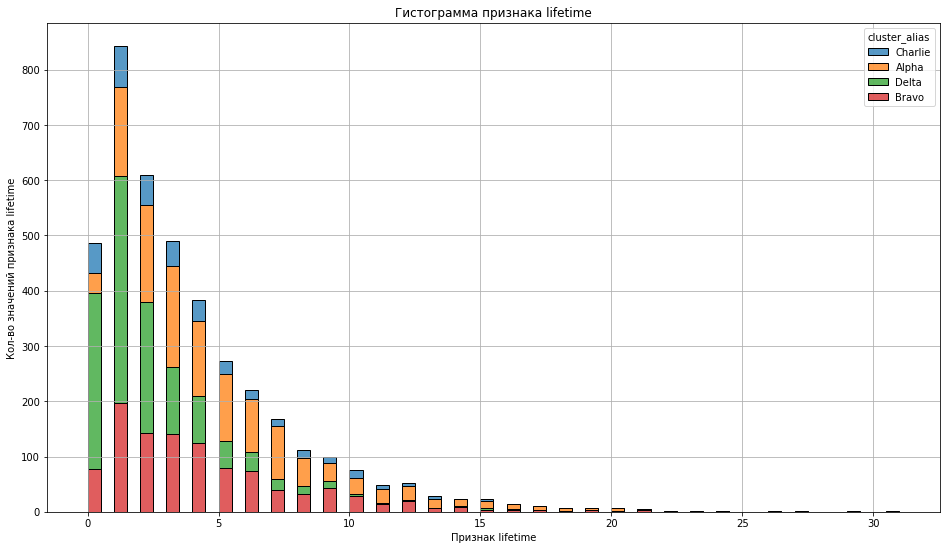

In [49]:
# строим гистограммы
show_hist('lifetime', 'stack', 'cluster_alias')

Как видно из графика, в кластере Delta больше всего новичков.

#### Признак `contract_period`

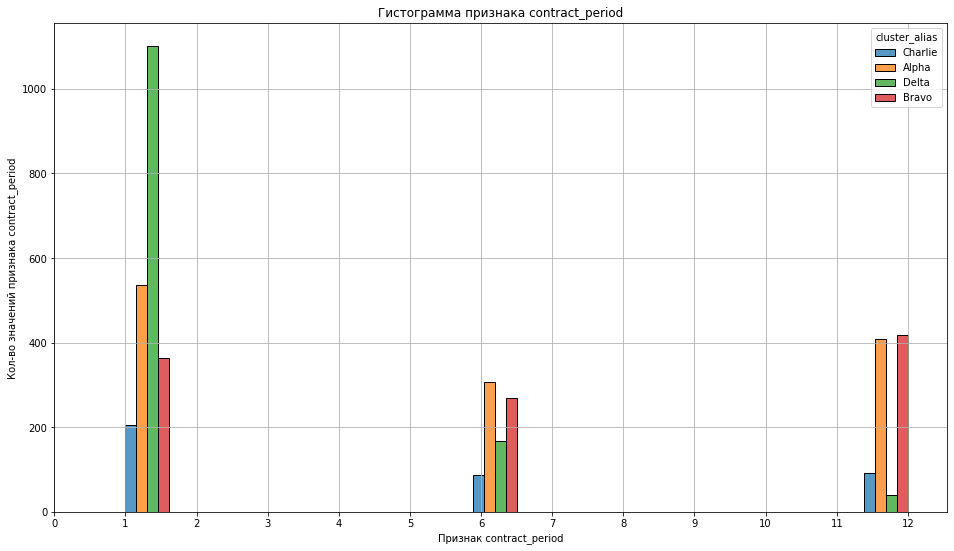

In [34]:
# строим гистограммы
show_hist('contract_period', 'dodge', 'cluster_alias')

Клиенты из кластера Delta в основном покупают месячные абоненементы, и почти не покупают годовых.

#### Признак `month_to_end_contract`

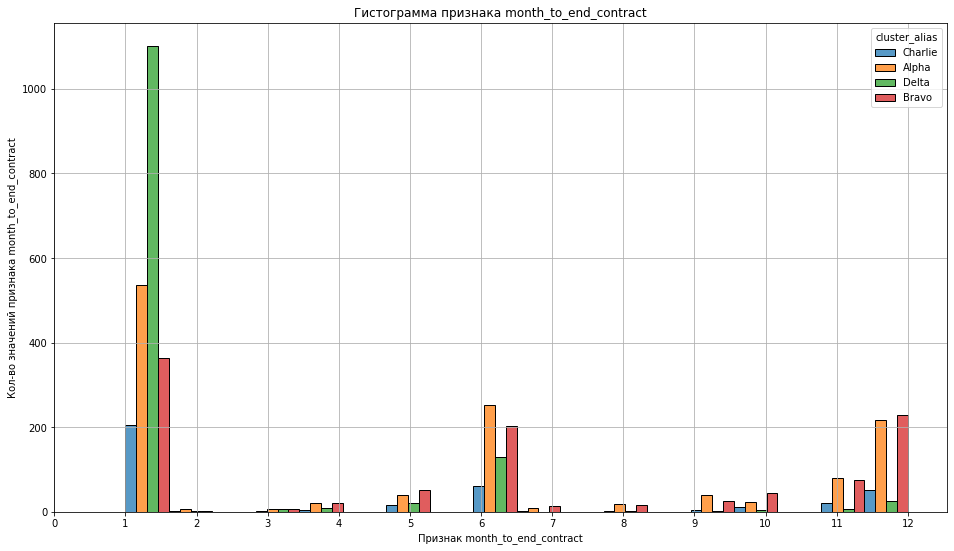

In [35]:
# строим гистограммы
show_hist('month_to_end_contract', 'dodge', 'cluster_alias')

#### Признак `avg_class_frequency_current_month`

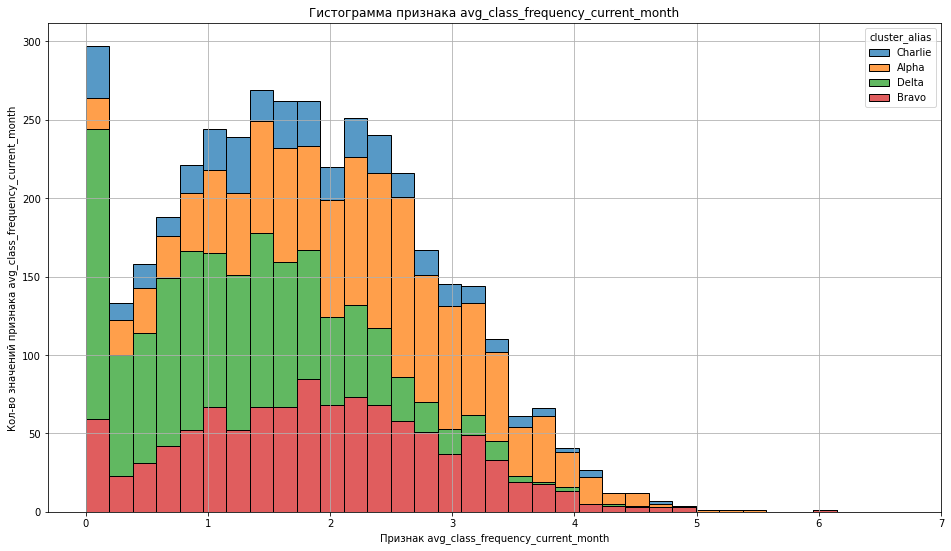

In [51]:
# строим гистограммы
show_hist('avg_class_frequency_current_month', 'stack', 'cluster_alias')

Признак имеет распределение, похожее на нормальное. Для кластера Bravo распределение находится около 2 месяцев, для кластера Alpha около 2,5 для остальных кластеров - около 1,5.

#### Признак `promo_friends`

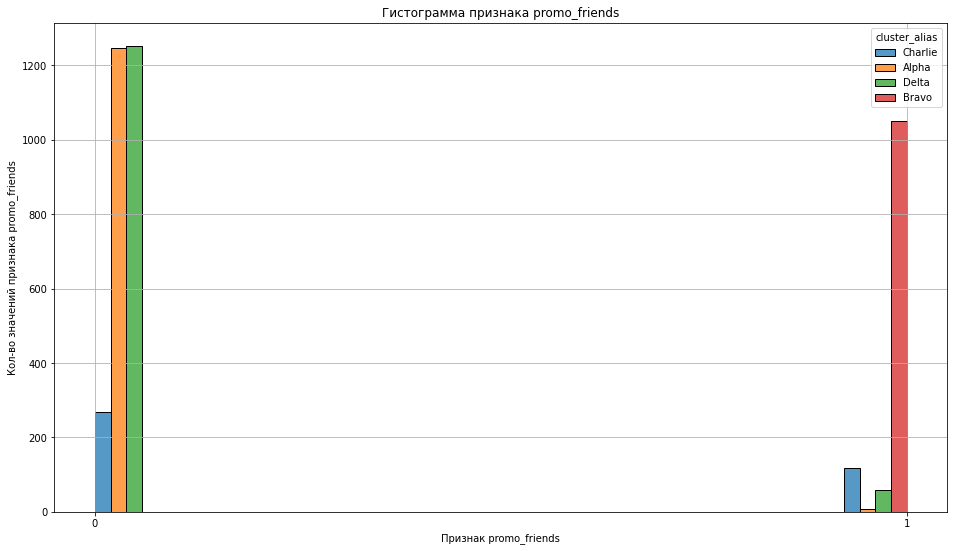

In [37]:
# строим гистограммы
show_hist('promo_friends', 'dodge', 'cluster_alias')

Как и было видно ранее, кластер Bravo целиком пришёл по рекомендации друзей.

#### Признак `group_visits`

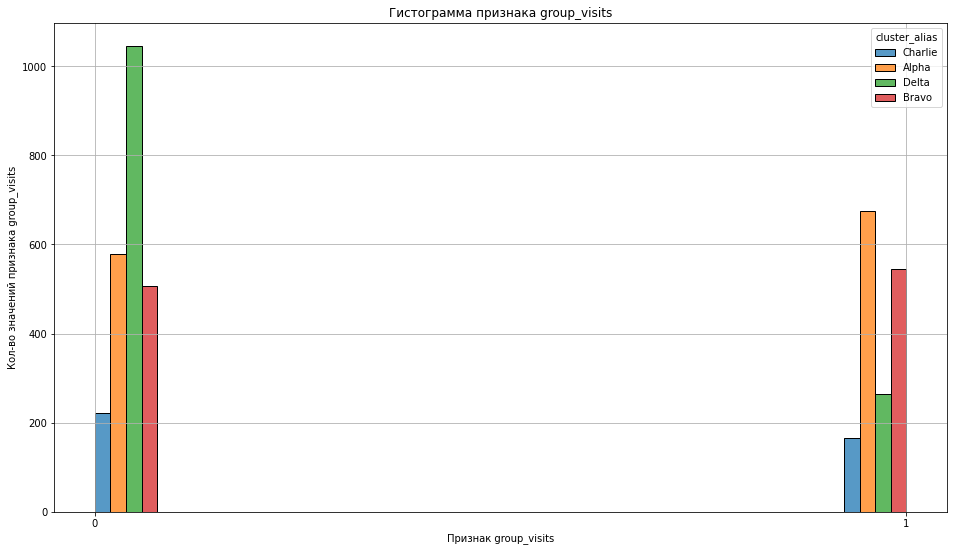

In [38]:
# строим гистограммы
show_hist('group_visits', 'dodge', 'cluster_alias')

Больше всего тех, кто не посещает групповые визиты - в кластере Delta.

#### Признак `partner`

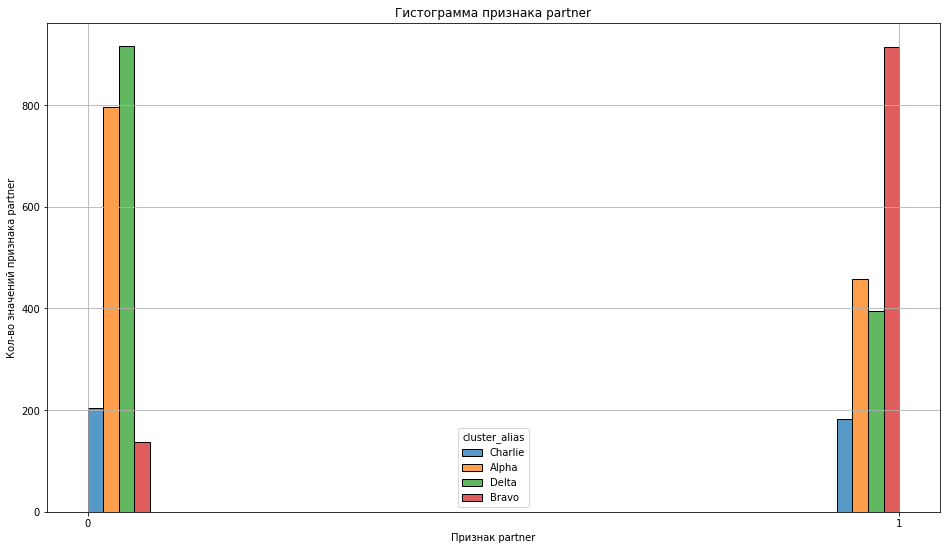

In [39]:
# строим гистограммы
show_hist('partner', 'dodge', 'cluster_alias')

Среди тех, кто пришёл по партнёрской программе, самое большое число клиентов в кластере Bravo. Среди тех, кто пришёл сам - в кластерах Alpha и Delta.

#### Признак `avg_additional_charges_total`

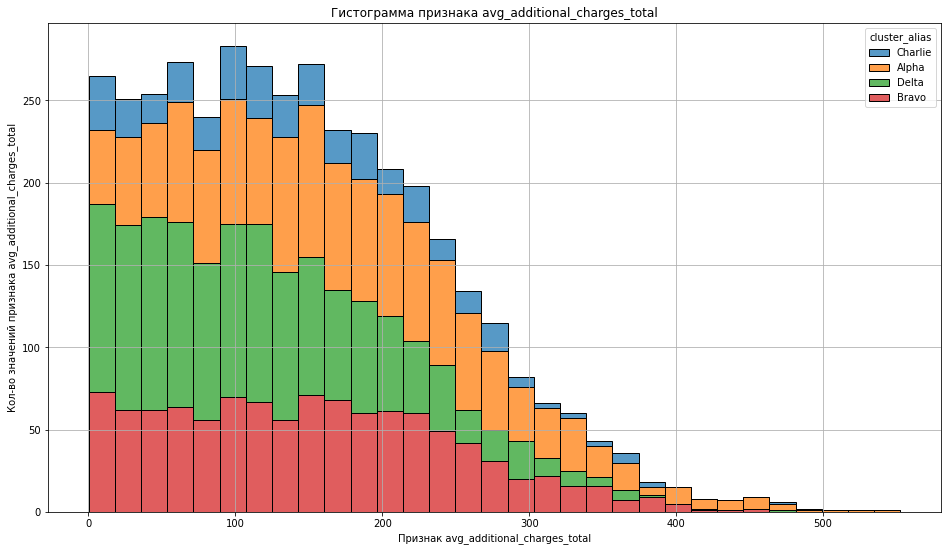

In [40]:
# строим гистограммы
show_hist('avg_additional_charges_total', 'stack', 'cluster_alias')

Распределение признака близко к распределению Пуассона.

#### Признак `avg_class_frequency_total`

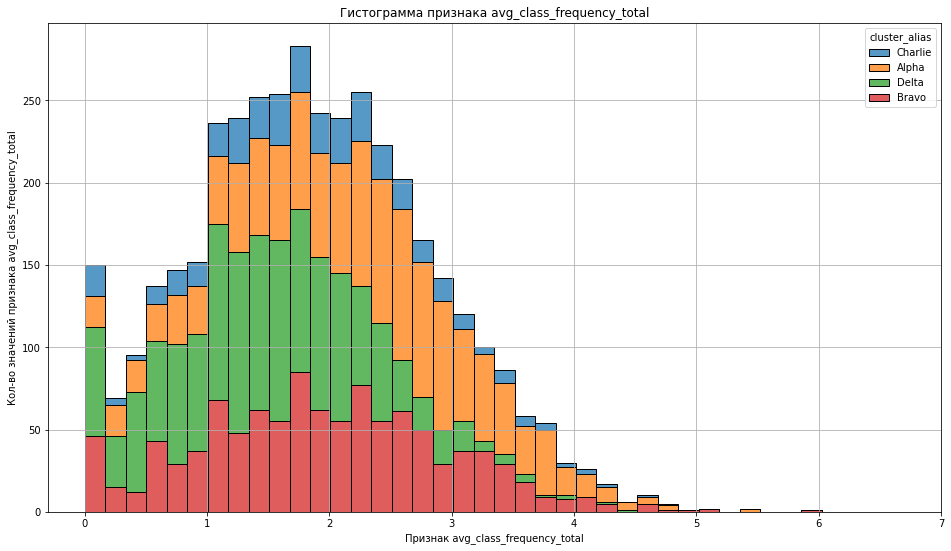

In [41]:
# строим гистограммы
show_hist('avg_class_frequency_total', 'stack', 'cluster_alias')

Как и в случае с признаком за текущий месяц, средняя посещаемость за всё время членства у кластера Bravo нормально распределена около 2 месяцев, у кластера Alpha возле 2,5, а у остальных кластеров - около 1,5.

#### Признак `near_location`

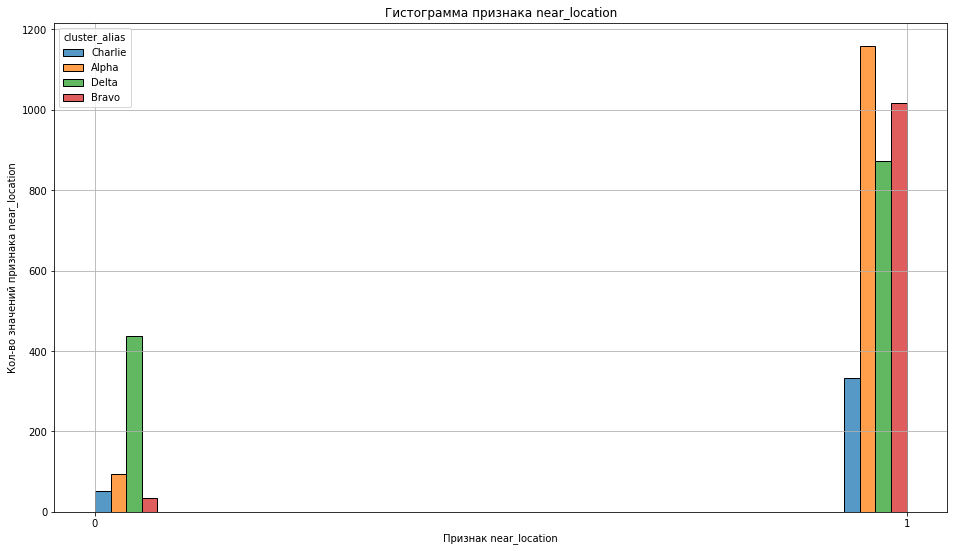

In [42]:
# строим гистограммы
show_hist('near_location', 'dodge', 'cluster_alias')

Среди тех, кто живёт в отдалении, больше всего клиентов в кластере Delta.

#### Признак `age`

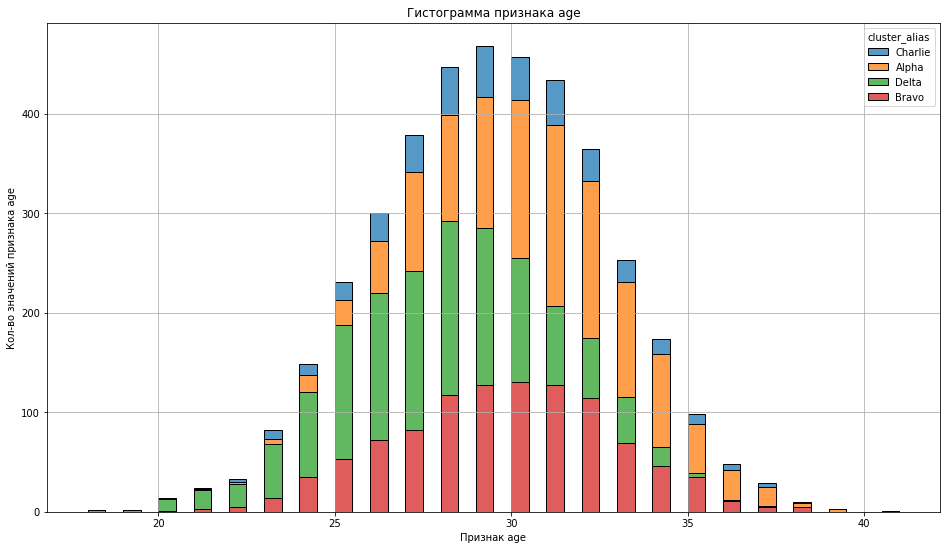

In [43]:
# строим гистограммы
show_hist('age', 'stack', 'cluster_alias')

Во всех кластерах возраст нормально распределён относительно значения 28-29 лет.

#### Признак `phone`

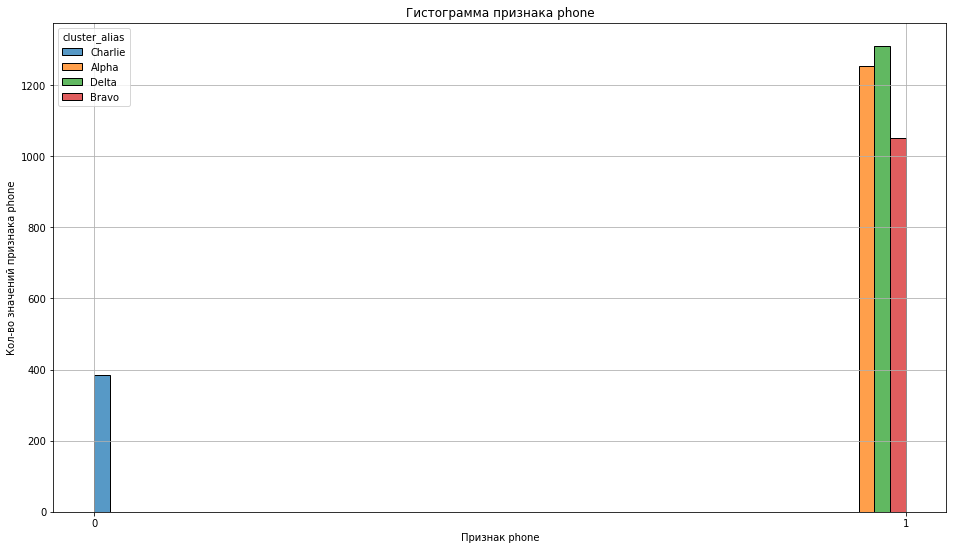

In [44]:
# строим гистограммы
show_hist('phone', 'dodge', 'cluster_alias')

Клиенты из кластера Charlie предпочитают не оставлять свой номер телефона.

#### Признак `gender`

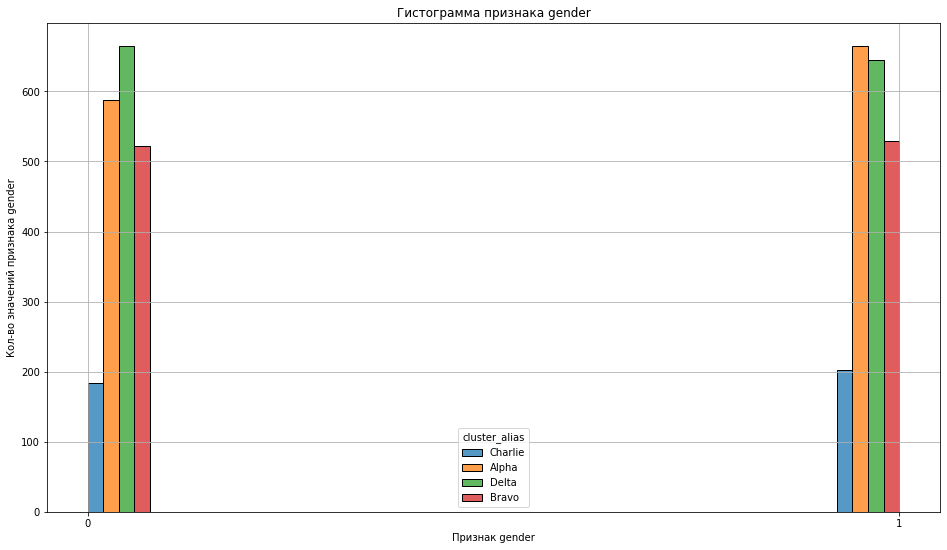

In [45]:
# строим гистограммы
show_hist('gender', 'dodge', 'cluster_alias')

Подтверждаем ранее увиденное - практически равное распределение признака во всех кластерах.

### Для каждого кластера посчитаем долю оттока

Помимо доли оттока, для выдачи более точных рекомендаций также неплохо будет посчитать количество пользователей в каждом кластере

In [46]:
# посчитаем долю оттока для каждого кластера и выведем на экран
display(data.groupby('cluster_alias').agg(
    {'churn':'mean', 'phone':'count'}
).rename(columns={'phone':'count'}).sort_values(by='churn', ascending=False))

,churn,count
cluster_alias,,
Delta,0.595420,1310
Charlie,0.266839,386
Bravo,0.129401,1051
Alpha,0.033520,1253


Как видно из таблицы, наибольшая доля оттока наблюдается в кластере Delta. Самые лояльный кластер - Alpha. При этом кластер с наибольшим оттоком самый многочисленный - его доля составляет 32,75% от всех пользователей в выборке. С этим точнно нужно что-то делать.

## Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами

### Общие выводы

1. Предоставленные данные были корректны и достаточно полны, для того, чтобы обучить модель
2. Из двух моделей наилучшие результаты показала линейная регрессия
3. Кластеризация с помощью k-means поделила наших клиентов на 4 кластера
4. В 1-м кластере из 4-х отток находится в приемлемых пределах (менее 5%), с остальными же кластерами нужно работать

### Рекомендации по работе с клиентами

Начнём с самого проблемного кластера, Delta. Вот типичный портрет его пользователей:
- большинство из них пришли сами, не по рекомендации или партнёрской программе;
- заключают краткосрочные контракты;
- меньше всех склонны к групповым визитам;
- наименьшие дополнительные траты в клубе;
- самая плохая посещаемость;

Как мы видим, данные клиенты приходят скорее всего случайно - возможно карты им кто-то подарил, или они вступили в клуб спонтанно, в порыве спортивного азарта. Для них сложнее всего подобрать какие-то рекомендации - деньги в клубе они тратят неохотно, посещают его редко, поэтому любые дополнительные акции скорее всего не найдут отклика. Но, так как этот кластер самый многочисленный, нам всё-таки нужно что-то с ним сделать. Одним из рациональных вариантов представляется бесплатное промо-занятие с персональным тренером, который сможет попытаться сделать посещение этих людей более осмысленным, и, возможно, мотивирует их на продолжение занятий в клубе. Также обязательно нужно собрать обратную связь от данной группы и выяснить, по возможности, конкретные причины оттока.


Кластеры Bravo и Charlie довольно схожи:
- среднесрочные контракты;
- средняя посещаемость уже выше 1,5 визитов;
- живут или работают, преимущественно, рядом с клубом;
- хороший процент по групповым занятиям;
- имеют длительное членство в клубе;
- повывшенные дополнительные траты;
- дополнительные траты - это среднее между кластером №1 и кластерами без оттока;

То есть можно сказать, что данные кластеры - это крепкие середнячки. Уже мотивированы на занятия, совершают неплохие дополнительные траты, т.е. в клуб ходят вполне осознанно и обдуманно. Таким клиентам можно предложить скидки на дополнительные товары в клубе для повышения дополнительных затрат, прорекламировать групповые занятия, т.к. к ним уже имеется интерес, предложить скидку на продление среднесрочного контракта до долгосрочного.
Также, у этих двух кластеров есть и отличия:
- кластер Charlie не имеет номеров телефонов в анкете, поэтому нужно обязательно проверить, есть ли актуальные каналы связи с этими клиентами, чтобы они могли получать наши предложения;
- кластер Bravo целиком пришёл по рекомендации друзей. Если у нас остались данные, по чьей рекомендации они пришли, то дополнительные предложения нужно будет разослать и тем, кто этих клиентов привёл, чтобы задействовать и данный канал

Но в общем и целом для всех кластеров первичным должен быть сбор обратной связи о реальных причинах расторжения контракта. 